# Kmeans and mini-batch kmeans Clustering 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn import metrics

from sklearn import datasets

In [4]:
from sklearn.datasets import fetch_openml

digits =  fetch_openml('mnist_784', version=1)

X = digits.data
y = digits.target

mnist_df= pd.DataFrame(X)
mnist_df['label']= y.astype(int)
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [5]:
sorted(mnist_df['label'].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)]

In [6]:
mnist_features= mnist_df.drop('label',axis=1)
mnist_features.sample(4)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
62289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist_labels=mnist_df['label']
mnist_labels.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [8]:
def display_image(index):
    print("Digit", mnist_labels[index])

    plt.imshow(mnist_features.loc[index].values.reshape(28,28), cmap='Greys')

Digit 4


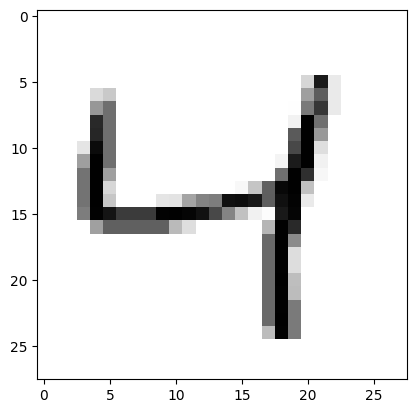

In [11]:
display_image(2)

## Perfrom Kmeans on Images Data

In [12]:
kmeans_model=KMeans(n_clusters=10,max_iter=1000).fit(mnist_features)

In [13]:
kmean_centroids= kmeans_model.cluster_centers_
kmean_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
kmean_centroids.shape

(10, 784)

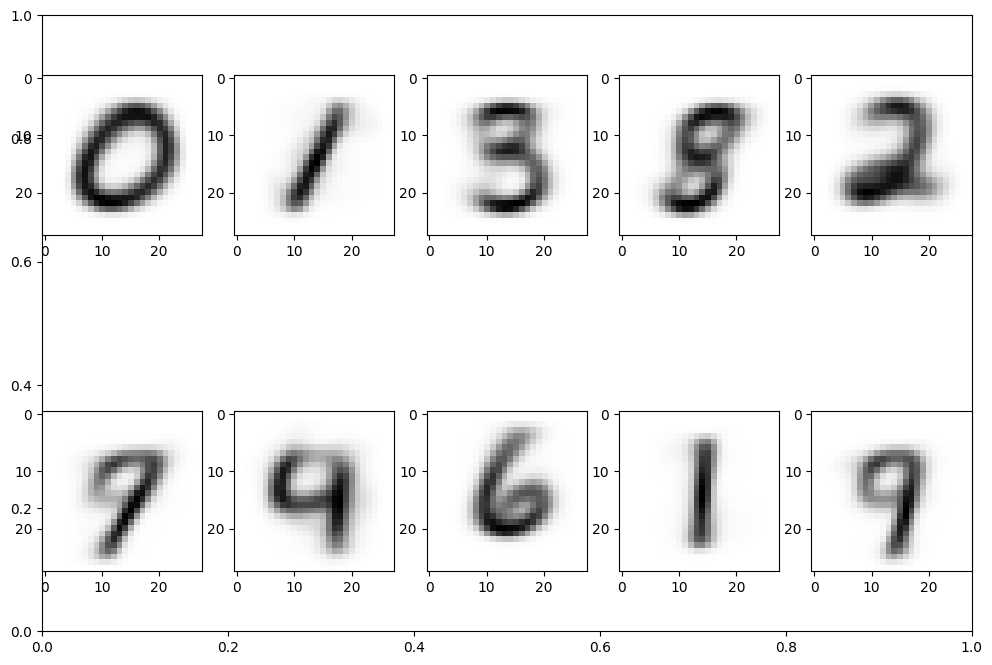

In [20]:
fig, ax= plt.subplots(figsize=(12,8))

for centroid in range(len(kmean_centroids)):
    plt.subplot(2,5,centroid + 1)

    plt.imshow(kmean_centroids[centroid].reshape(28,28),cmap='Greys')

In [21]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [22]:
mnist_test= mnist_df.sample(10,replace=False)

mnist_test_features= mnist_test.drop('label',axis=1)

mnist_test_labels= mnist_test['label']

In [23]:
mnist_test_labels

54854    2
6045     0
34023    3
689      0
45154    6
10948    8
47419    0
48026    0
3670     3
48527    2
Name: label, dtype: int64

In [24]:
mnist_test_labels= np.array(mnist_test_labels)
mnist_test_labels

array([2, 0, 3, 0, 6, 8, 0, 0, 3, 2])

In [25]:
pred_clusters= kmeans_model.predict(mnist_test_features)

In [26]:
pred_result= pd.DataFrame({
    'actual_digit':mnist_test_labels,
    'pred_cluster':pred_clusters
})

pred_result.head()

,actual_digit,pred_cluster
0,2,4
1,0,0
2,3,2
3,0,0
4,6,7


! pred cluster is just a labels that assigned to clusters

## Mini Batch Kmeans

In [27]:
mini_batch_model= MiniBatchKMeans(n_clusters=10,max_iter=1000,batch_size=100).fit(mnist_features)

In [28]:
mini_batch_centroids= mini_batch_model.cluster_centers_
mini_batch_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

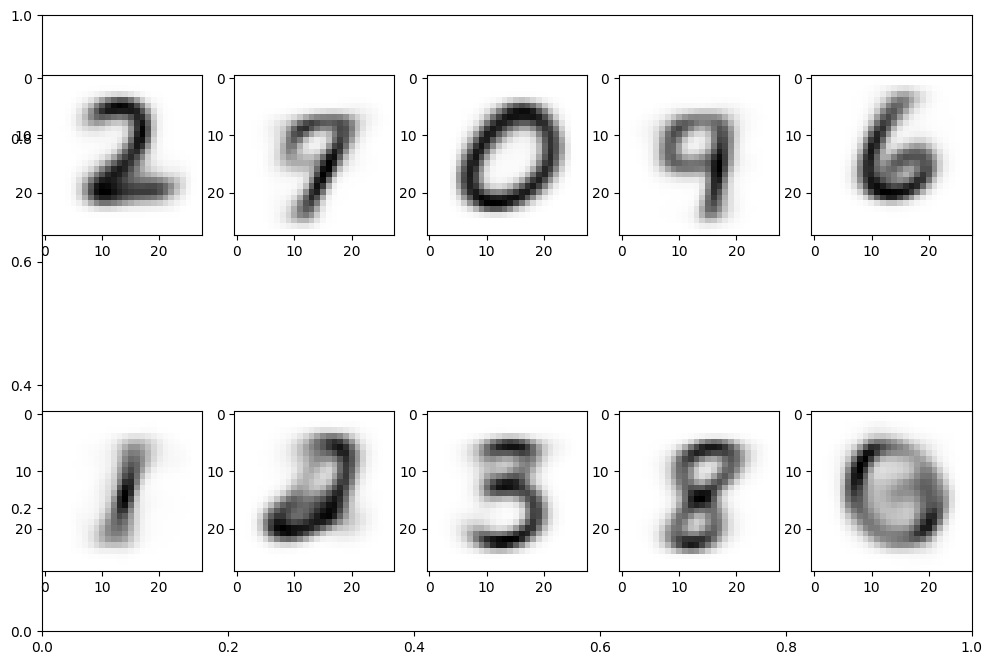

In [29]:
fig, ax= plt.subplots(figsize=(12,8))

for centroid in range(len(mini_batch_centroids)):
    plt.subplot(2,5,centroid+1)

    plt.imshow(mini_batch_centroids[centroid].reshape(28,28),cmap="Greys")